<a href="https://colab.research.google.com/github/TsadimasArgyris/DataEngineering/blob/master/StohasticFinanceMidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

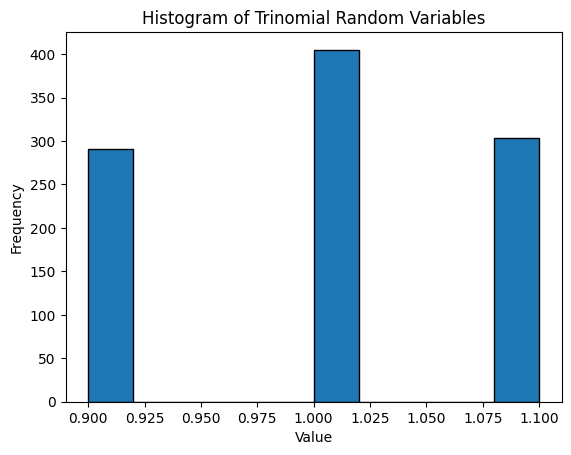

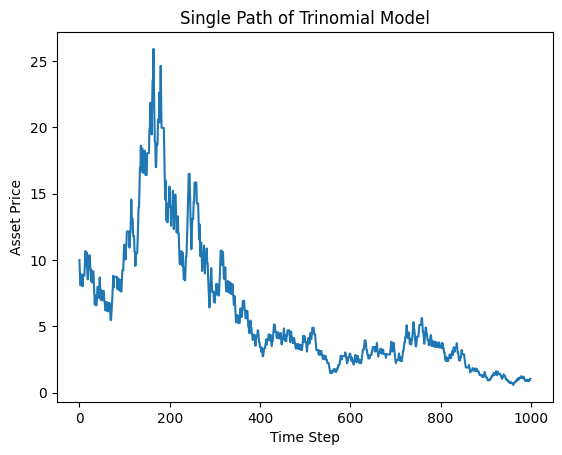

Simulated E[S(T)]: 12.439972661092632
Simulated Var(S(T)) : 29914.838610284554
Analytical E[S(T)]: 10.0
Analytical Var(S(T)) : 39526.04422587325


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trinomial_rv(u, m, d, p_u, p_m, p_d):
    rand = np.random.rand()
    if rand < p_u:
        return u
    elif rand < p_u + p_m:
        return m
    else:
        return d

# Parameters
u = 1.1
m = 1.0
d = 0.9
p_u = 0.3
p_m = 0.4
p_d = 0.3

# Generate trinomial random variables
N = 1000
values = np.array([trinomial_rv(u, m, d, p_u, p_m, p_d) for _ in range(N)])

# Plot histogram
plt.hist(values, bins=10, edgecolor='black')
plt.title('Histogram of Trinomial Random Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Function to generate a single path
def generate_path(S_0, u, m, d, p_u, p_m, p_d, T):
    path = np.zeros(T)
    path[0] = S_0
    for t in range(1, T):
        path[t] = path[t-1] * trinomial_rv(u, m, d, p_u, p_m, p_d)
    return path

# Simulate a single path
T = 1000
S_0 = 10
single_path = generate_path(S_0, u, m, d, p_u, p_m, p_d, T)

# Plot the single path
plt.plot(single_path)
plt.title('Single Path of Trinomial Model')
plt.xlabel('Time Step')
plt.ylabel('Asset Price')
plt.show()

# Function to generate multiple paths
def generate_multiple_paths(S_0, u, m, d, p_u, p_m, p_d, T, M):
    paths = np.zeros((M, T))
    for i in range(M):
        paths[i, :] = generate_path(S_0, u, m, d, p_u, p_m, p_d, T)
    return paths

# Simulate multiple paths
M = 10000  # Number of paths
multiple_paths = generate_multiple_paths(S_0, u, m, d, p_u, p_m, p_d, T, M)

# Calculate expected value and variance of the final prices
expected_final_price = np.mean(multiple_paths[:, -1])
variance_final_price = np.var(multiple_paths[:, -1])

print(f"Simulated E[S(T)]: {expected_final_price}")
print(f"Simulated Var(S(T)) : {variance_final_price}")

# Analytical calculations for comparison
expected_ST_analytic = S_0 * ((p_u * u) + (p_m * m) + (p_d * d))**T
variance_ST_analytic = (S_0**2) * ((p_u * u**2) + (p_m * m**2) + (p_d * d**2))**T - expected_ST_analytic**2

print(f"Analytical E[S(T)]: {expected_ST_analytic}")
print(f"Analytical Var(S(T)) : {variance_ST_analytic}")
